<a href="https://colab.research.google.com/github/yidelee/2025_denoising_tf_gw_dl_nm/blob/main/signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of paper
Abstract<br>
link to journal, google scholar

Please note that the codes used in our work was improved but not optimized. Modify them freely in your research if needed.

## Get access to GitHub

In [1]:
! git clone https://github.com/yidelee/2025_denoising_tf_gw_dl_nm.git

Cloning into '2025_denoising_tf_gw_dl_nm'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 66.38 KiB | 511.00 KiB/s, done.
Resolving deltas: 100% (6/6), done.


## Install packages

We mainly used <code>gwpy</code> and <code>pycbc</code> respectively for getting the data and calculating SNR. We didn't specify the versions of the package as long as they could work.

In [2]:
! pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.5 MB/s eta 0:00:00


In [3]:
! pip install -q pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 1

## Detector data
We collected the noise segments from the third observation run of LIGO Hanford (o3a_H1) by <code>TimeSeries.fetch_open_data</code> in <code>gwpy</code> package. Segment cotaining events recoreded in the [Event List in GWOSC](https://gwosc.org/eventapi/html/allevents/) were excluded. We didn't avoid glitches or other anamolies unless the segment was unaccessible. In such case, we skipped the current interval and continued to fetch for the next (not shown here).<br>
<br>
The following code is an example for getting pure noise. The data is fetched in sample rate 16384 Hz, which is different from the normal usage (4096 Hz). It's then resample to 8192 Hz by <code>scipy.signal.resample</code>. Although 4096 Hz automatically filters the high-frequecny quantum noises, we would rather like to process the 8192 Hz data since the data points are more connected for denoising (not yet proved to be helpful).

In [4]:
%reset -f

In [5]:
from gwpy.timeseries import TimeSeries
from scipy.signal import resample

fs = 8192; ## sampling rate
dur = 2;   ## duration of the noise segment

noise = TimeSeries.fetch_open_data("H1", 1238167085, 1238167087, sample_rate = 16384);
noise = resample(noise, fs * dur);

/usr/local/lib/python3.11/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


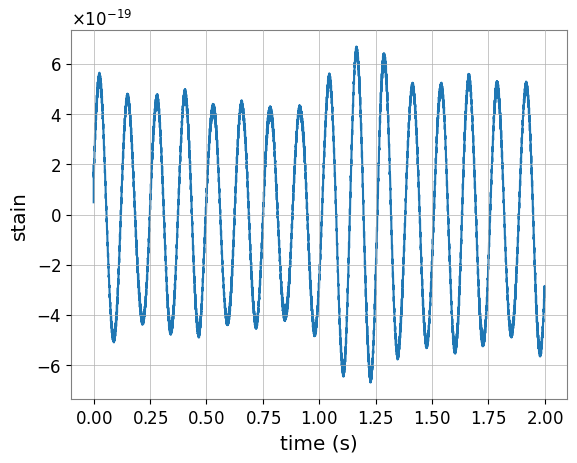

In [6]:
import matplotlib.pyplot as plt
import numpy as np

time = np.arange(0., dur, 1. / fs);

plt.plot(time, noise);
plt.xlabel("time (s)");
plt.ylabel("stain");
plt.show();

We repeated the procedue to fetch 80000 noises for model training. Although the raw data (actually the data from GWOSC isn't really raw) will be processed later, we recommand to keep the raw data to flexibly change and compare among different signal processings. Data fetching can be time-comsuming and it may be good to save the untouched version.

## PSD and whitening
The PSD used for whitening is different from the normal Welch method. Actually, it's more appropriate to call it "energy spectral density". We directly transferred the noise into frequency domain and averaged 5000 frequency spectrums to be our PSD. We whitened all the mixed signal and clean waveform by directly dividing the current spectrum by our PSD. We neglected the unsmoothed boundaries during all the above manipulations because the boundaries were cropped and not been seen by deep learning model. Even though our method is not the mainstream, we demonstrated that the data is processed in the way we wanted and the relatively careless signal processing might not drastically affect the data quantity.<br>
<br>
The following code presents the calculation of our PSD and the whitening results.

In [101]:
%reset -f

In [106]:
from gwpy.timeseries import TimeSeries
from scipy.signal import resample
from scipy.fft import rfft
from scipy.signal.windows import tukey
import numpy as np
from tqdm import tqdm

fs = 8192; ## sampling rate
dur = 2;   ## duration of the noise segment

## fetch dataset for averaging PSD
n = 1000;
t0 = 1238167085
for i in tqdm(range(n)):
    t1 = t0 + 2.;
    globals()["noise_%d" % i] = TimeSeries.fetch_open_data("H1", t0, t1, sample_rate = 16384);
    globals()["noise_%d" % i] = resample(globals()["noise_%d" % i], fs * dur);
    globals()["psd_%d" % i] = np.abs(rfft(globals()["noise_%d" % i] * tukey(len(globals()["noise_%d" % i]), alpha = 0.05))) ** 2;
    t0 = t1;

100%|██████████| 20/20 [00:59<00:00,  2.97s/it]


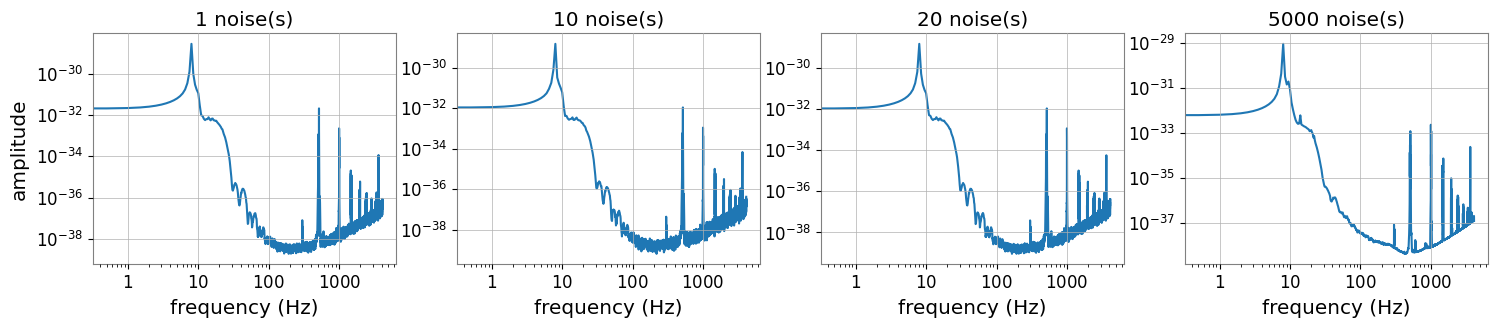

In [144]:
import matplotlib.pyplot as plt

## calculate the averaged PSDs
nlist = [1, int(n * 0.5), n];
for i in range(3):
    globals()["avgpsd_%d" % i] = globals()["psd_0"].copy();
    for j in range(nlist[i]):
        globals()["avgpsd_%d" % i] += globals()["psd_%d" % j];
    globals()["avgpsd_%d" % i] /= nlist[i];

## upload the PSD we used
globals()["avgpsd_3"] = np.load("/content/2025_denoising_tf_gw_dl_nm/psd_2s.npy");

## visualize PSDs
df = fs / (dur * fs);
freq = np.arange(0., fs * 0.5 + df, df);

plt.figure(figsize = (18, 3));
plt.tight_layout();
for i in range(4):
    plt.subplot(1, 4, i + 1);
    plt.loglog(freq, globals()["avgpsd_%d" % i]);
    plt.xlabel("frequency (Hz)");
    plt.title("%d noise(s)" % (nlist[i] if i != 3 else 5000));
    if i == 0: plt.ylabel("amplitude");
plt.show();

In [137]:
for i in range(3):
    print(globals()["psd_%d" % i][0])

1.0601833480317536e-32
1.4066320045104495e-32
1.322375354602451e-32


We use <code>tensorflow</code> for whitening becasue the model is processing tensor types.

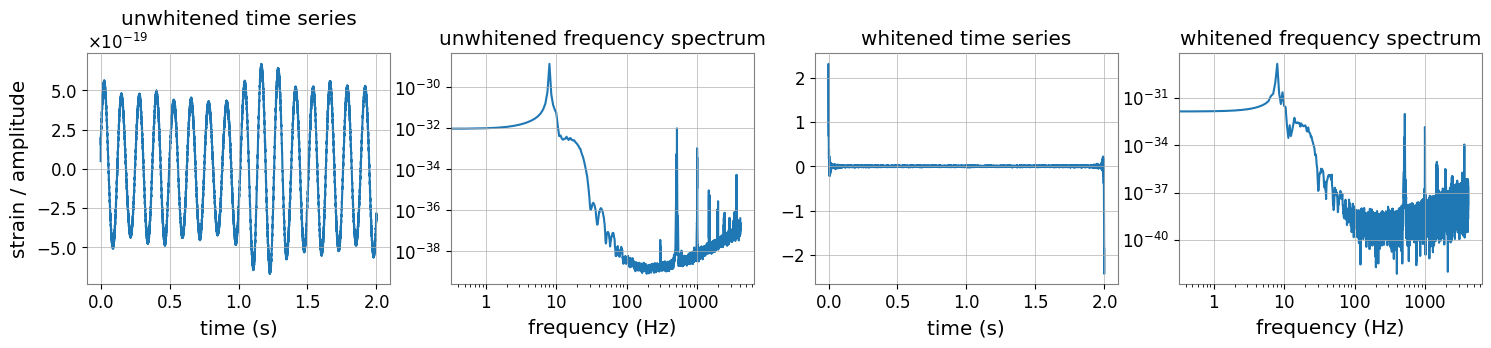

In [111]:
import tensorflow as tf

def whiten(a, asd):
    afft = tf.signal.rfft(a);
    asd  = tf.cast(asd, afft.dtype);
    afft = tf.math.divide(afft, asd);
    return  tf.signal.irfft(afft);

noise0 = globals()["noise_0"];
noise1 = whiten(noise0, tf.math.sqrt(globals()["avgpsd_3"]));
psd0 = globals()["psd_0"];
psd1 = np.abs(rfft(globals()["noise_%d" % i] * tukey(len(globals()["noise_%d" % i]), alpha = 0.05))) ** 2

time = np.arange(0., dur, 1. / fs);
plt.figure(figsize = (18, 3));
plt.tight_layout();
for i in range(2):
    plt.subplot(1, 4, 1 + i * 2);
    plt.plot(time, noise0 if i == 0 else noise1);
    plt.xlabel("time (s)");
    if i == 0: plt.ylabel("strain / amplitude");
    plt.title("%s time series" % ("unwhitened" if i == 0 else "whitened"));

    plt.subplot(1, 4, 2 + i * 2);
    plt.loglog(freq, psd0 if i == 0 else psd1);
    plt.xlabel("frequency (Hz)");
    plt.title("%s frequency spectrum" % ("unwhitened" if i == 0 else "whitened"));
plt.show();

There are large distorsions on the boundaries. Only the middle 1 second is injected with waveform and is kept for denoising.

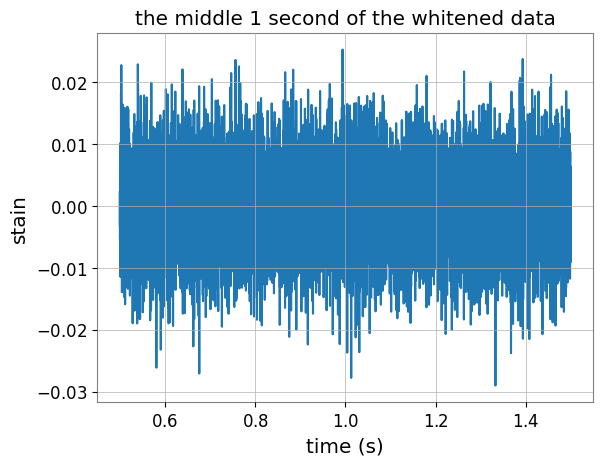

In [114]:
plt.plot(time[int(len(time) * 0.25) : int(len(time) * 0.75)], noise1[int(len(time) * 0.25) : int(len(time) * 0.75)]);
plt.xlabel("time (s)");
plt.ylabel("stain");
plt.title("the middle 1 second of the whitened data");
plt.show();

## Match-filtering

## Relation between scaling ratio and SNR